## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  68.417346   427.507509  0.696419  6.704613  1.566438
1  85.141622   818.980820  0.291678  2.865261  1.239614
2  14.756674   190.526515  0.693909  2.754106  1.591187
3  96.014727   625.843323  0.878913  5.512342  1.410400
4  58.418374  1364.020804  0.767416  1.756087  1.357562


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.96656 | train_mse: 5.64882 | train_mae: 1.75988 |  0:00:00s
epoch 1  | loss: 0.91237 | train_mse: 5.54512 | train_mae: 1.77548 |  0:00:00s
epoch 2  | loss: 0.46747 | train_mse: 3.12977 | train_mae: 1.44035 |  0:00:00s


epoch 3  | loss: 0.41983 | train_mse: 1.47779 | train_mae: 0.92031 |  0:00:00s
epoch 4  | loss: 0.37702 | train_mse: 1.52499 | train_mae: 0.96471 |  0:00:00s
epoch 5  | loss: 0.39783 | train_mse: 1.63521 | train_mae: 1.00937 |  0:00:00s


epoch 6  | loss: 0.37834 | train_mse: 1.25951 | train_mae: 0.89607 |  0:00:00s
epoch 7  | loss: 0.37749 | train_mse: 0.80997 | train_mae: 0.69727 |  0:00:00s
epoch 8  | loss: 0.31698 | train_mse: 0.72442 | train_mae: 0.63801 |  0:00:00s


epoch 9  | loss: 0.38443 | train_mse: 0.75342 | train_mae: 0.66756 |  0:00:01s
epoch 10 | loss: 0.42551 | train_mse: 0.60313 | train_mae: 0.59397 |  0:00:01s
epoch 11 | loss: 0.29609 | train_mse: 0.68605 | train_mae: 0.61255 |  0:00:01s


epoch 12 | loss: 0.32869 | train_mse: 0.81949 | train_mae: 0.68422 |  0:00:01s
epoch 13 | loss: 0.26178 | train_mse: 0.75461 | train_mae: 0.66441 |  0:00:01s
epoch 14 | loss: 0.35478 | train_mse: 0.63998 | train_mae: 0.59937 |  0:00:01s


epoch 15 | loss: 0.34431 | train_mse: 0.72969 | train_mae: 0.62974 |  0:00:01s


epoch 16 | loss: 0.28183 | train_mse: 0.63121 | train_mae: 0.57979 |  0:00:01s


epoch 17 | loss: 0.27955 | train_mse: 0.64254 | train_mae: 0.58389 |  0:00:02s
epoch 18 | loss: 0.26611 | train_mse: 0.49228 | train_mae: 0.49913 |  0:00:02s


epoch 19 | loss: 0.35942 | train_mse: 0.39023 | train_mae: 0.4436  |  0:00:02s
epoch 20 | loss: 0.34333 | train_mse: 0.31998 | train_mae: 0.43662 |  0:00:02s


epoch 21 | loss: 0.29762 | train_mse: 0.30528 | train_mae: 0.38808 |  0:00:02s
epoch 22 | loss: 0.33598 | train_mse: 0.28285 | train_mae: 0.37592 |  0:00:02s
epoch 23 | loss: 0.22936 | train_mse: 0.26318 | train_mae: 0.35753 |  0:00:02s


epoch 24 | loss: 0.20421 | train_mse: 0.28174 | train_mae: 0.37021 |  0:00:02s


epoch 25 | loss: 0.3592  | train_mse: 0.28701 | train_mae: 0.36281 |  0:00:03s
epoch 26 | loss: 0.22453 | train_mse: 0.28046 | train_mae: 0.38088 |  0:00:03s


epoch 27 | loss: 0.18606 | train_mse: 0.2672  | train_mae: 0.36962 |  0:00:03s
epoch 28 | loss: 0.25985 | train_mse: 0.24531 | train_mae: 0.34838 |  0:00:03s
epoch 29 | loss: 0.18432 | train_mse: 0.21643 | train_mae: 0.33215 |  0:00:03s


epoch 30 | loss: 0.26936 | train_mse: 0.19665 | train_mae: 0.31167 |  0:00:03s
epoch 31 | loss: 0.17833 | train_mse: 0.19633 | train_mae: 0.30749 |  0:00:03s
epoch 32 | loss: 0.25821 | train_mse: 0.23704 | train_mae: 0.33664 |  0:00:03s


epoch 33 | loss: 0.196   | train_mse: 0.23325 | train_mae: 0.33799 |  0:00:04s
epoch 34 | loss: 0.28655 | train_mse: 0.22033 | train_mae: 0.3248  |  0:00:04s
epoch 35 | loss: 0.38195 | train_mse: 0.18765 | train_mae: 0.30102 |  0:00:04s


epoch 36 | loss: 0.29756 | train_mse: 0.16804 | train_mae: 0.2868  |  0:00:04s
epoch 37 | loss: 0.26118 | train_mse: 0.1735  | train_mae: 0.29814 |  0:00:04s
epoch 38 | loss: 0.20625 | train_mse: 0.16272 | train_mae: 0.28519 |  0:00:04s


epoch 39 | loss: 0.19896 | train_mse: 0.16492 | train_mae: 0.28655 |  0:00:04s
epoch 40 | loss: 0.14757 | train_mse: 0.17424 | train_mae: 0.28933 |  0:00:04s
epoch 41 | loss: 0.14907 | train_mse: 0.18787 | train_mae: 0.30715 |  0:00:04s


epoch 42 | loss: 0.19455 | train_mse: 0.17736 | train_mae: 0.28818 |  0:00:04s
epoch 43 | loss: 0.18737 | train_mse: 0.18182 | train_mae: 0.28911 |  0:00:04s
epoch 44 | loss: 0.18906 | train_mse: 0.17976 | train_mae: 0.28728 |  0:00:04s


epoch 45 | loss: 0.16802 | train_mse: 0.16433 | train_mae: 0.27588 |  0:00:05s
epoch 46 | loss: 0.15834 | train_mse: 0.13865 | train_mae: 0.26299 |  0:00:05s
epoch 47 | loss: 0.20582 | train_mse: 0.14245 | train_mae: 0.26689 |  0:00:05s


epoch 48 | loss: 0.24433 | train_mse: 0.13451 | train_mae: 0.26011 |  0:00:05s
epoch 49 | loss: 0.16007 | train_mse: 0.13357 | train_mae: 0.24906 |  0:00:05s
epoch 50 | loss: 0.22864 | train_mse: 0.1453  | train_mae: 0.2558  |  0:00:05s


epoch 51 | loss: 0.22719 | train_mse: 0.13329 | train_mae: 0.24716 |  0:00:05s
epoch 52 | loss: 0.14206 | train_mse: 0.12562 | train_mae: 0.23608 |  0:00:05s
epoch 53 | loss: 0.23395 | train_mse: 0.14043 | train_mae: 0.26847 |  0:00:05s


epoch 54 | loss: 0.1843  | train_mse: 0.15101 | train_mae: 0.27598 |  0:00:05s
epoch 55 | loss: 0.20727 | train_mse: 0.14525 | train_mae: 0.26525 |  0:00:05s
epoch 56 | loss: 0.17918 | train_mse: 0.16059 | train_mae: 0.28251 |  0:00:05s


epoch 57 | loss: 0.271   | train_mse: 0.14587 | train_mae: 0.26841 |  0:00:06s
epoch 58 | loss: 0.28368 | train_mse: 0.13994 | train_mae: 0.27518 |  0:00:06s
epoch 59 | loss: 0.17302 | train_mse: 0.1577  | train_mae: 0.29283 |  0:00:06s


epoch 60 | loss: 0.15384 | train_mse: 0.16164 | train_mae: 0.28959 |  0:00:06s
epoch 61 | loss: 0.13684 | train_mse: 0.1758  | train_mae: 0.29276 |  0:00:06s
epoch 62 | loss: 0.16424 | train_mse: 0.15989 | train_mae: 0.27871 |  0:00:06s


epoch 63 | loss: 0.15175 | train_mse: 0.14379 | train_mae: 0.26567 |  0:00:06s
epoch 64 | loss: 0.23984 | train_mse: 0.13835 | train_mae: 0.25549 |  0:00:06s
epoch 65 | loss: 0.23508 | train_mse: 0.12653 | train_mae: 0.25932 |  0:00:06s


epoch 66 | loss: 0.21875 | train_mse: 0.18878 | train_mae: 0.29692 |  0:00:06s
epoch 67 | loss: 0.19559 | train_mse: 0.16385 | train_mae: 0.29589 |  0:00:07s


epoch 68 | loss: 0.20046 | train_mse: 0.11197 | train_mae: 0.24371 |  0:00:07s
epoch 69 | loss: 0.14441 | train_mse: 0.10063 | train_mae: 0.225   |  0:00:07s


epoch 70 | loss: 0.26843 | train_mse: 0.09902 | train_mae: 0.22208 |  0:00:07s
epoch 71 | loss: 0.18889 | train_mse: 0.10627 | train_mae: 0.2372  |  0:00:07s


epoch 72 | loss: 0.10733 | train_mse: 0.1363  | train_mae: 0.27177 |  0:00:07s
epoch 73 | loss: 0.23361 | train_mse: 0.15216 | train_mae: 0.28419 |  0:00:07s


epoch 74 | loss: 0.18567 | train_mse: 0.11203 | train_mae: 0.24034 |  0:00:07s
epoch 75 | loss: 0.20741 | train_mse: 0.12027 | train_mae: 0.23872 |  0:00:08s


epoch 76 | loss: 0.25807 | train_mse: 0.2133  | train_mae: 0.31364 |  0:00:08s
epoch 77 | loss: 0.17457 | train_mse: 0.17063 | train_mae: 0.27076 |  0:00:08s


epoch 78 | loss: 0.24366 | train_mse: 0.14617 | train_mae: 0.25833 |  0:00:08s
epoch 79 | loss: 0.1965  | train_mse: 0.14011 | train_mae: 0.26207 |  0:00:08s


epoch 80 | loss: 0.12888 | train_mse: 0.13524 | train_mae: 0.27221 |  0:00:08s
epoch 81 | loss: 0.12624 | train_mse: 0.13121 | train_mae: 0.2731  |  0:00:08s
epoch 82 | loss: 0.21657 | train_mse: 0.13233 | train_mae: 0.26541 |  0:00:08s


epoch 83 | loss: 0.16896 | train_mse: 0.12672 | train_mae: 0.26092 |  0:00:09s
epoch 84 | loss: 0.13864 | train_mse: 0.12549 | train_mae: 0.25136 |  0:00:09s
epoch 85 | loss: 0.16878 | train_mse: 0.13344 | train_mae: 0.2573  |  0:00:09s


epoch 86 | loss: 0.22331 | train_mse: 0.13618 | train_mae: 0.26653 |  0:00:09s
epoch 87 | loss: 0.17016 | train_mse: 0.13064 | train_mae: 0.25614 |  0:00:09s
epoch 88 | loss: 0.17401 | train_mse: 0.11797 | train_mae: 0.24489 |  0:00:09s


epoch 89 | loss: 0.13556 | train_mse: 0.13148 | train_mae: 0.26451 |  0:00:09s
epoch 90 | loss: 0.10512 | train_mse: 0.15356 | train_mae: 0.29194 |  0:00:09s
epoch 91 | loss: 0.14854 | train_mse: 0.1279  | train_mae: 0.26955 |  0:00:09s


epoch 92 | loss: 0.19223 | train_mse: 0.11592 | train_mae: 0.25494 |  0:00:09s
epoch 93 | loss: 0.13961 | train_mse: 0.14911 | train_mae: 0.28887 |  0:00:09s
epoch 94 | loss: 0.15982 | train_mse: 0.20033 | train_mae: 0.33266 |  0:00:10s


epoch 95 | loss: 0.20997 | train_mse: 0.18005 | train_mae: 0.31416 |  0:00:10s
epoch 96 | loss: 0.12783 | train_mse: 0.127   | train_mae: 0.25304 |  0:00:10s
epoch 97 | loss: 0.1804  | train_mse: 0.09177 | train_mae: 0.22304 |  0:00:10s


epoch 98 | loss: 0.22442 | train_mse: 0.10124 | train_mae: 0.23409 |  0:00:10s
epoch 99 | loss: 0.16267 | train_mse: 0.12437 | train_mae: 0.26007 |  0:00:10s


epoch 100| loss: 0.1346  | train_mse: 0.12758 | train_mae: 0.24952 |  0:00:10s
epoch 101| loss: 0.19771 | train_mse: 0.11995 | train_mae: 0.24738 |  0:00:10s
epoch 102| loss: 0.11993 | train_mse: 0.09574 | train_mae: 0.22585 |  0:00:10s


epoch 103| loss: 0.20089 | train_mse: 0.08756 | train_mae: 0.20963 |  0:00:10s
epoch 104| loss: 0.18249 | train_mse: 0.08009 | train_mae: 0.19965 |  0:00:10s
epoch 105| loss: 0.12841 | train_mse: 0.09531 | train_mae: 0.22906 |  0:00:11s


epoch 106| loss: 0.16116 | train_mse: 0.1066  | train_mae: 0.24252 |  0:00:11s
epoch 107| loss: 0.13214 | train_mse: 0.10338 | train_mae: 0.23551 |  0:00:11s


epoch 108| loss: 0.13176 | train_mse: 0.09339 | train_mae: 0.22195 |  0:00:11s
epoch 109| loss: 0.14237 | train_mse: 0.12007 | train_mae: 0.24553 |  0:00:11s
epoch 110| loss: 0.23627 | train_mse: 0.12377 | train_mae: 0.25507 |  0:00:11s


epoch 111| loss: 0.14173 | train_mse: 0.11137 | train_mae: 0.25027 |  0:00:11s
epoch 112| loss: 0.18745 | train_mse: 0.09708 | train_mae: 0.23114 |  0:00:11s
epoch 113| loss: 0.18787 | train_mse: 0.09121 | train_mae: 0.22854 |  0:00:11s


epoch 114| loss: 0.24159 | train_mse: 0.09776 | train_mae: 0.24058 |  0:00:11s
epoch 115| loss: 0.16927 | train_mse: 0.09154 | train_mae: 0.23821 |  0:00:11s
epoch 116| loss: 0.17131 | train_mse: 0.08391 | train_mae: 0.22557 |  0:00:11s


epoch 117| loss: 0.12228 | train_mse: 0.0845  | train_mae: 0.22342 |  0:00:12s
epoch 118| loss: 0.19606 | train_mse: 0.0855  | train_mae: 0.22275 |  0:00:12s


epoch 119| loss: 0.12264 | train_mse: 0.08143 | train_mae: 0.21818 |  0:00:12s
epoch 120| loss: 0.13924 | train_mse: 0.08564 | train_mae: 0.2247  |  0:00:12s
epoch 121| loss: 0.12779 | train_mse: 0.10426 | train_mae: 0.24411 |  0:00:12s


epoch 122| loss: 0.13281 | train_mse: 0.09439 | train_mae: 0.23038 |  0:00:12s
epoch 123| loss: 0.1386  | train_mse: 0.09597 | train_mae: 0.22774 |  0:00:12s
epoch 124| loss: 0.15973 | train_mse: 0.11051 | train_mae: 0.24033 |  0:00:12s


epoch 125| loss: 0.1549  | train_mse: 0.10337 | train_mae: 0.23093 |  0:00:12s
epoch 126| loss: 0.0818  | train_mse: 0.1166  | train_mae: 0.24384 |  0:00:12s
epoch 127| loss: 0.11339 | train_mse: 0.12401 | train_mae: 0.25607 |  0:00:12s


epoch 128| loss: 0.23749 | train_mse: 0.1256  | train_mae: 0.26114 |  0:00:13s
epoch 129| loss: 0.16642 | train_mse: 0.13255 | train_mae: 0.26626 |  0:00:13s
epoch 130| loss: 0.18953 | train_mse: 0.12341 | train_mae: 0.26582 |  0:00:13s


epoch 131| loss: 0.11637 | train_mse: 0.11055 | train_mae: 0.25806 |  0:00:13s
epoch 132| loss: 0.13201 | train_mse: 0.11771 | train_mae: 0.25316 |  0:00:13s
epoch 133| loss: 0.11869 | train_mse: 0.14735 | train_mae: 0.27154 |  0:00:13s


epoch 134| loss: 0.10822 | train_mse: 0.16584 | train_mae: 0.28571 |  0:00:13s
epoch 135| loss: 0.17118 | train_mse: 0.13134 | train_mae: 0.25542 |  0:00:13s
epoch 136| loss: 0.15455 | train_mse: 0.1075  | train_mae: 0.23877 |  0:00:13s


epoch 137| loss: 0.08569 | train_mse: 0.11269 | train_mae: 0.23904 |  0:00:13s
epoch 138| loss: 0.15391 | train_mse: 0.12043 | train_mae: 0.24575 |  0:00:13s
epoch 139| loss: 0.15723 | train_mse: 0.11159 | train_mae: 0.24024 |  0:00:14s


epoch 140| loss: 0.11943 | train_mse: 0.08341 | train_mae: 0.20807 |  0:00:14s
epoch 141| loss: 0.28978 | train_mse: 0.08425 | train_mae: 0.21283 |  0:00:14s
epoch 142| loss: 0.16556 | train_mse: 0.13299 | train_mae: 0.245   |  0:00:14s


epoch 143| loss: 0.2836  | train_mse: 0.11156 | train_mae: 0.2344  |  0:00:14s
epoch 144| loss: 0.14997 | train_mse: 0.09927 | train_mae: 0.23134 |  0:00:14s
epoch 145| loss: 0.17678 | train_mse: 0.10304 | train_mae: 0.23657 |  0:00:14s


epoch 146| loss: 0.10941 | train_mse: 0.09559 | train_mae: 0.22417 |  0:00:14s
epoch 147| loss: 0.12509 | train_mse: 0.11026 | train_mae: 0.23785 |  0:00:14s
epoch 148| loss: 0.31182 | train_mse: 0.11992 | train_mae: 0.25008 |  0:00:14s


epoch 149| loss: 0.1521  | train_mse: 0.11577 | train_mae: 0.25432 |  0:00:14s
epoch 150| loss: 0.20439 | train_mse: 0.12996 | train_mae: 0.25704 |  0:00:14s
epoch 151| loss: 0.15144 | train_mse: 0.12142 | train_mae: 0.24827 |  0:00:15s


epoch 152| loss: 0.21181 | train_mse: 0.40498 | train_mae: 0.34053 |  0:00:15s
epoch 153| loss: 0.20685 | train_mse: 0.46667 | train_mae: 0.37481 |  0:00:15s


epoch 154| loss: 0.23482 | train_mse: 0.352   | train_mae: 0.34809 |  0:00:15s

Early stopping occurred at epoch 154 with best_epoch = 104 and best_train_mae = 0.19965
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

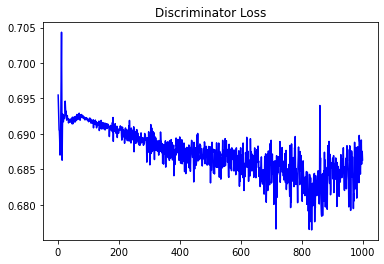

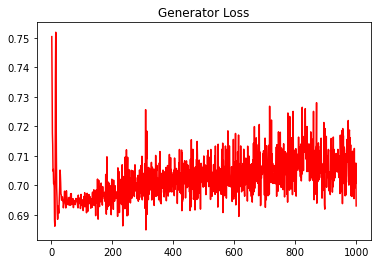

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1910291862012573


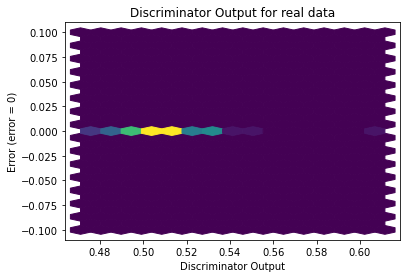

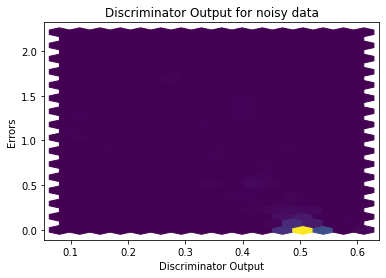

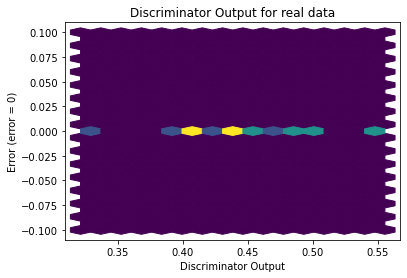

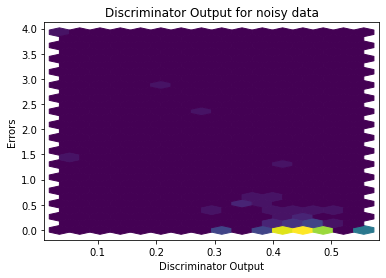

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


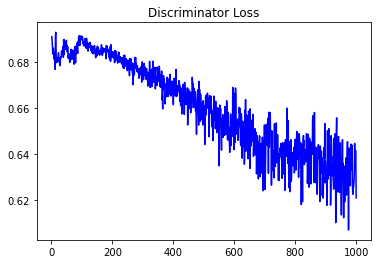

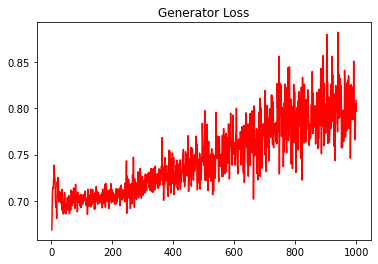

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12900737775952964


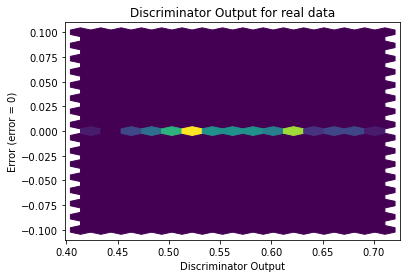

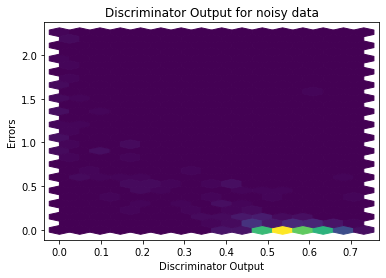

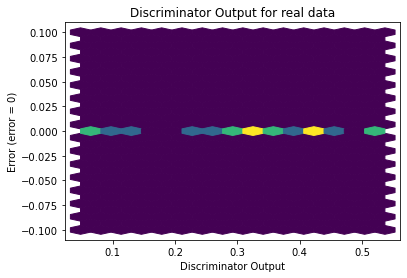

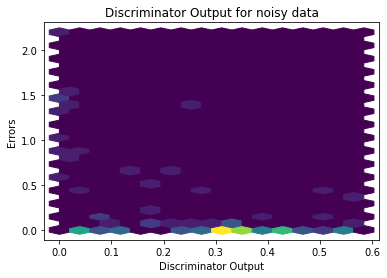

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1713]], requires_grad=True)
